# Downloading and Extracting MovieLens Latest Datasets

In [1]:
##!pip install wget
#import wget
#import shutil
#import os

## Downloading Zip file
#data_link = "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
#filename = wget.download(data_link)

## Extracting zipfile
#shutil.unpack_archive(filename)

## File present
#print()
#print("Files present :",os.listdir("ml-latest-small"))

# Preprocessing

In [2]:
# libraries are pre-written code that provide useful functionalities and tools allowing developers to save time and effort
import pandas as pd
import numpy as np

## loaded file as pandas dataframe
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')
links = pd.read_csv('ml-latest-small/links.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')

## 1. Clean the data-set and Merging datasets needed
merged_dataset = pd.merge(movies, ratings, how='inner', on='movieId')

## 2. Select features to be focused on
# removing extra columns
merged_dataset2 = merged_dataset.drop(['timestamp'],axis=1)
merged_dataset2.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


# Data Analysis

In [3]:
num_users = len(merged_dataset['userId'].value_counts())
num_items = len(merged_dataset['title'].value_counts())
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))

Unique number of users in the dataset: 610
Unique number of movies in the dataset: 9719


In [4]:
merged_dataset_temp = pd.DataFrame(merged_dataset.groupby(['rating']).size(), columns=['count'])
merged_dataset_temp

,count
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


Text(0, 0.5, 'number of ratings')

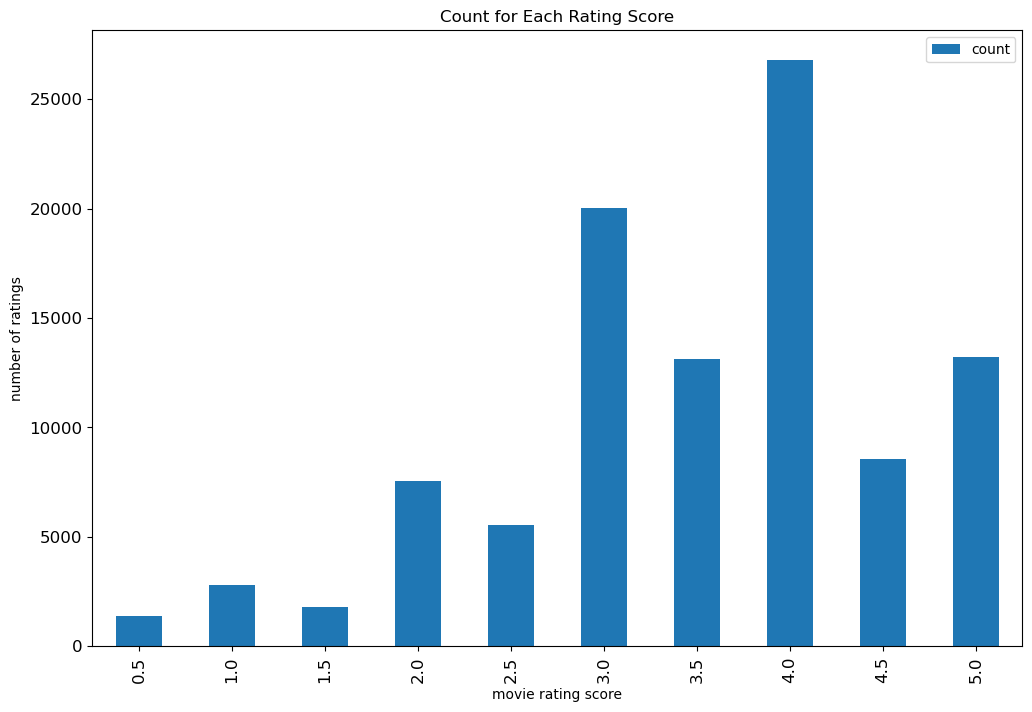

In [5]:
ax = merged_dataset_temp.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    fontsize=12)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

Looking at the above Graph the data looks well distributed

In [6]:
# get rating frequency
movies_count_df = pd.DataFrame(merged_dataset.groupby('title').size(), columns=['count'])
movies_count_df.tail()

,count
title,
eXistenZ (1999),22
xXx (2002),24
xXx: State of the Union (2005),5
¡Three Amigos! (1986),26
À nous la liberté (Freedom for Us) (1931),1


Text(0, 0.5, 'number of ratings')

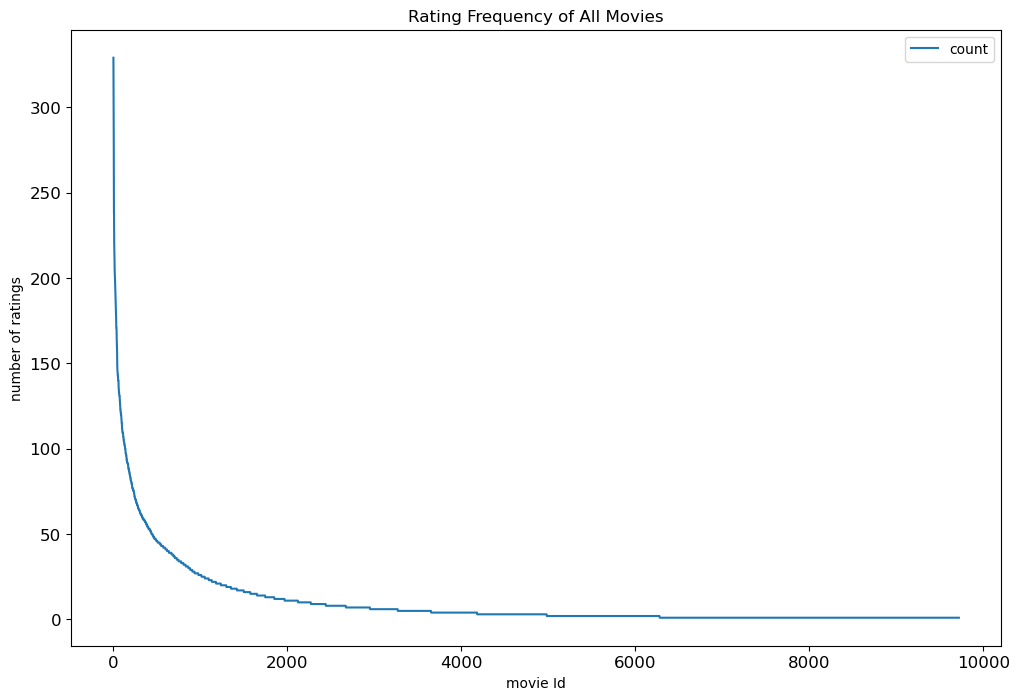

In [7]:
# plot rating frequency of all movies
ax = movies_count_df \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

 According to this property, only a small fraction of the items are rated frequently. Such items are referred to as popular items. The vast majority of items are rated rarely. This results in a highly skewed distribution of the underlying ratings.

# Building user-based KNN model (take user id as input)
pivot_table = create spreadsheet-style pivot table as a DataFrame in a tabular format, similar to a spreadsheet.

csr_matrix = creates a sparse matrix in Compressed Sparse Row (CSR)

sparse matrix = contains mostly non-zero elements, resulting in significant memory savings for large matrices, necessary when working with large datasets in machine learning, where the size of the data can quickly become a bottleneck.

NearestNeighbors = use to find the k-nearest neighbors of a given data point in a dataset based on a distance metric.

metric='cosine' = cosine of the angle between two vectors in a high-dimensional space.

algorithm='brute' = brute-force search by computing the distance between each pair of data points in the dataset.

knn_model = K-Nearest Neighbors is a supervised machine learning algorithm used for classification and regression tasks, by identifying k nearest data points in the training dataset to a new data point using a distance metric, such as cosine similarity to classifie or predict. K is a hyperparameter that specifies the number of neighbors to consider.

In [8]:
user_to_movie_df = merged_dataset2.pivot_table(index='userId',columns='title',values='rating').fillna(0)
display(user_to_movie_df.head())

movies_list = user_to_movie_df.columns

from scipy.sparse import csr_matrix
user_to_movie_sparse_df = csr_matrix(user_to_movie_df.values)

from sklearn.neighbors import NearestNeighbors
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_to_movie_sparse_df)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


NearestNeighbors(algorithm='brute', metric='cosine')

# Building item-based KNN model (take movie name as input)
pivot_table = create spreadsheet-style pivot table as a DataFrame in a tabular format, similar to a spreadsheet.

csr_matrix = creates a sparse matrix in Compressed Sparse Row (CSR)

sparse matrix = contains mostly non-zero elements, resulting in significant memory savings for large matrices, necessary when working with large datasets in machine learning, where the size of the data can quickly become a bottleneck.

NearestNeighbors = use to find the k-nearest neighbors of a given data point in a dataset based on a distance metric.

metric='cosine' = cosine of the angle between two vectors in a high-dimensional space.

algorithm='brute' = brute-force search by computing the distance between each pair of data points in the dataset.

knn_model = K-Nearest Neighbors is a supervised machine learning algorithm used for classification and regression tasks, by identifying k nearest data points in the training dataset to a new data point using a distance metric, such as cosine similarity to classifie or predict. K is a hyperparameter that specifies the number of neighbors to consider.

In [9]:
movie_to_user_df = merged_dataset2.pivot_table(index='title',columns='userId',values='rating').fillna(0)
display(movie_to_user_df.head())

movie_dict = {movie : index for index, movie in enumerate(movies_list)}

from scipy.sparse import csr_matrix
movie_to_user_sparse_df = csr_matrix(movie_to_user_df.values)

from sklearn.neighbors import NearestNeighbors
knn_movie_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_movie_model.fit(movie_to_user_sparse_df)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


NearestNeighbors(algorithm='brute', metric='cosine')

# function to Recommend Movies on basis of user

In [10]:
def fun(user):
    n = 5
    knn_input = np.asarray([user_to_movie_df.values[user-1]])
    distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
    similar_user_list, distance_list = indices.flatten()[1:] + 1, distances.flatten()[1:]
    mov_rtngs_sim_users = user_to_movie_df.values[similar_user_list]
    movies_list = user_to_movie_df.columns # list of all movies
    mean_rating_list = mov_rtngs_sim_users.sum(axis =0)
    n = 100
    n = min(len(mean_rating_list),n)
    MovieRecommended = list(movies_list[np.argsort(mean_rating_list)[::-1][:n]])
    return(MovieRecommended)

print("Movie Recommended System")
while True:
    try:
        string = input("Select User Between 1 to 610 : ")
        user = int(string)
        if user < 1 or user > 610:
            raise ValueError()
    except ValueError: # if value error raised print this
        print('Kindly select user from the range of (1 to 610)')
    else:
        break

MovieRecommended = fun(user)
TList = []
GList = [] 
for i in MovieRecommended:
    TList.append(i)
    index = merged_dataset.title.tolist().index(i)
    Mgenre = merged_dataset[["genres"]].iloc[index]
    Mgenre = Mgenre.to_string(index=False)
    GList.append(Mgenre)

RecommendationGenre = pd.DataFrame([TList, GList], index=['title', 'genres']).T.explode('genres')
R = ((RecommendationGenre).values)
print()
genre_input = input("Enter genre: ")

action_movies = RecommendationGenre["genres"].str.contains(genre_input)
display(RecommendationGenre.loc[action_movies, ["title", "genres"]][:10].reset_index(drop=True))

Movie Recommended System
Select User Between 1 to 610 : 654
Kindly select user from the range of (1 to 610)
Select User Between 1 to 610 : 45

Enter genre: Action


,title,genres
0,Children of Men (2006),Action|Adventure|Drama|Sci-Fi|Thriller
1,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller
2,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
3,City of God (Cidade de Deus) (2002),Action|Adventure|Crime|Drama|Thriller
4,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller
5,Fight Club (1999),Action|Crime|Drama|Thriller
6,"Bourne Ultimatum, The (2007)",Action|Crime|Thriller
7,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX
8,Casino Royale (2006),Action|Adventure|Thriller
9,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy


# function to Recommend Movies on basis of user and take movie name as input

In [11]:
L = []
def get_similar_movies(movie, n = 10):
  index = movie_dict[movie]
  knn_input = np.asarray([movie_to_user_df.values[index]])
  n = min(len(movies_list)-1,n)
  distances, indices = knn_movie_model.kneighbors(knn_input, n_neighbors=n+1)
  
  for i in range(1,len(distances[0])):
    L.append(movies_list[indices[0][i]])
  return(L)

movie_name = input("Enter the Movie name: ")
get_similar_movies(movie_name,100)

MovieRecommended = get_similar_movies(movie_name,15)
TList = []
GList = []
for i in MovieRecommended:
    TList.append(i)
    index = merged_dataset.title.tolist().index(i)
    Mgenre = merged_dataset[["genres"]].iloc[index]
    Mgenre = Mgenre.to_string(index=False)
    GList.append(Mgenre)

RecommendationGenre = pd.DataFrame([TList, GList], index=['title', 'genres']).T.explode('genres')
R = ((RecommendationGenre).values)
genre_input = input("Enter genre: ")
action_movies = RecommendationGenre["genres"].str.contains(genre_input)
display(RecommendationGenre.loc[action_movies, ["title", "genres"]][:10].reset_index(drop=True))

Enter the Movie name: Gladiator (2000)
Enter genre: Action


,title,genres
0,"Matrix, The (1999)",Action|Sci-Fi|Thriller
1,"Bourne Identity, The (2002)",Action|Mystery|Thriller
2,Saving Private Ryan (1998),Action|Drama|War
3,Fight Club (1999),Action|Crime|Drama|Thriller
4,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
5,X-Men (2000),Action|Adventure|Sci-Fi
6,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
7,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
8,Batman Begins (2005),Action|Crime|IMAX
9,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure


# Spell Checker

In [12]:
case_insensitive_movies_list = [i.lower() for i in movies_list]

# function which takes input and returns suggestions for the user

def get_possible_movies(movie):

    temp = ''
    possible_movies = case_insensitive_movies_list.copy()
    for i in movie :
      out = []
      temp += i
      for j in possible_movies:
        if temp in j:
          out.append(j)
      if len(out) == 0:
          return possible_movies
      out.sort()
      possible_movies = out.copy()

    return possible_movies

class invalid(Exception):
    pass

def spell_correction():
    
    try:

      movie_name = input("Enter the Movie name: ")
      movie_name_lower = movie_name.lower()
      if movie_name_lower not in case_insensitive_movies_list :
        raise invalid
      else :
        num_recom = 10
        get_similar_movies(movies_list[case_insensitive_movies_list.index(movie_name_lower)],num_recom)

    except invalid:

      possible_movies = get_possible_movies(movie_name_lower)

      if len(possible_movies) == len(movies_list) :
        print("Movie name entered is does not exist in the list ")
      else :
        indices = [case_insensitive_movies_list.index(i) for i in possible_movies]
        print("Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :\n",[movies_list[i] for i in indices[:10]])
        spell_correction()
        
spell_correction()

Enter the Movie name: Matrix
Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :
 ['Animatrix, The (2003)', 'Matrix Reloaded, The (2003)', 'Matrix Revolutions, The (2003)', 'Matrix, The (1999)']
Enter the Movie name: Matrix Reloaded, The (2003)
